In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder as le , OneHotEncoder as ohe
import category_encoders as ce

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
input_file = os.path.join('.','data','drive_time_sedans.csv')

In [5]:
df_data = pd.read_csv(input_file)

In [6]:
input_file = os.path.join('.','data','drive_time_sedans_val.csv')
df_val_data = pd.read_csv(input_file)
df_val_data= df_val_data.rename(columns={'total.cost':'cost','lot.sale.days':'lot_time','overage':'is_over_age',
                       'mileage':'mileage','vehicle.type':'vehicle_type','domestic.import':'is_domestic','vehicle.age':'vehicle_age',
                       'vehicle.age.group':'age_group','color.set':'color','makex':'make','state':'state','make.model':'make_model'}
              )
df_val_data.to_dict('records')

[{'Item': 'Item 1',
  'cost': 4751,
  'lot_time': 126,
  'is_over_age': 'YES',
  'mileage': 77606,
  'vehicle_type': 'ECONOMY',
  'is_domestic': 'Domestic',
  'vehicle_age': 5,
  'age_group': 'FIVE',
  'color': 'BLUE',
  'make': 'CHEVROLET',
  'state': 'FL',
  'make_model': 'CHEVROLET.CAVALIER'},
 {'Item': 'Item 2',
  'cost': 4274,
  'lot_time': 74,
  'is_over_age': 'NO',
  'mileage': 71542,
  'vehicle_type': 'FAMILY.SMALL',
  'is_domestic': 'Import',
  'vehicle_age': 8,
  'age_group': 'SEVEN+',
  'color': 'BLACK',
  'make': 'NISSAN',
  'state': 'CA',
  'make_model': 'NISSAN.SENTRA'},
 {'Item': 'Item 3',
  'cost': 6356,
  'lot_time': 21,
  'is_over_age': 'NO',
  'mileage': 81708,
  'vehicle_type': 'FAMILY.MEDIUM',
  'is_domestic': 'Domestic',
  'vehicle_age': 5,
  'age_group': 'FIVE',
  'color': 'GOLD',
  'make': 'PONTIAC',
  'state': 'VA',
  'make_model': 'PONTIAC.GRAND PRIX'},
 {'Item': 'Item 4',
  'cost': 4509,
  'lot_time': 53,
  'is_over_age': 'NO',
  'mileage': 62224,
  'vehicle_

In [7]:
df_data.head()

,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
0,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SEVEN+,SILVER,BUICK,CA,BUICK.CENTURY
1,4662,18,NO,69384,FAMILY.SMALL,Import,4,FOUR,SILVER,MAZDA,TX,MAZDA.PROTEGE
2,4459,65,NO,58239,ECONOMY,Import,4,FOUR,RED,GEO,FL,GEO.METRO
3,4279,1,NO,58999,ECONOMY,Import,3,ONE-THREE,RED,KIA,TX,KIA.SEPHIA
4,4472,37,NO,47234,FAMILY.MEDIUM,Domestic,6,SIX,BLUE,MERCURY,NM,MERCURY.MYSTIQUE


In [8]:
df_data= df_data.rename(columns={'total.cost':'cost','lot.sale.days':'lot_time','overage':'is_over_age',
                       'mileage':'mileage','vehicle.type':'vehicle_type','domestic.import':'is_domestic','vehicle.age':'vehicle_age',
                       'vehicle.age.group':'age_group','color.set':'color','makex':'make','state':'state','make.model':'make_model'}
              )

In [55]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17476 entries, 0 to 17475
Data columns (total 12 columns):
cost            17476 non-null int64
lot_time        17476 non-null int64
is_over_age     17476 non-null object
mileage         17476 non-null int64
vehicle_type    17476 non-null object
is_domestic     17476 non-null object
vehicle_age     17476 non-null int64
age_group       17476 non-null object
color           17476 non-null object
make            17476 non-null object
state           17476 non-null object
make_model      17476 non-null object
dtypes: int64(4), object(8)
memory usage: 1.6+ MB


In [7]:
df_data.describe()

,cost,lot_time,mileage,vehicle_age
count,17476.000000,17476.000000,17476.000000,17476.000000
mean,4895.368448,46.838579,76959.355974,5.440948
std,934.575831,52.777534,16978.555212,1.751322
min,1375.000000,0.000000,82.000000,1.000000
25%,4301.000000,7.000000,67260.000000,4.000000
50%,4852.500000,24.000000,77974.500000,5.000000
75%,5444.000000,74.000000,89090.500000,7.000000
max,9813.000000,300.000000,119250.000000,12.000000


### Checking values of categorical attributes

In [8]:
df_data.columns

Index(['cost', 'lot_time', 'is_over_age', 'mileage', 'vehicle_type',
       'is_domestic', 'vehicle_age', 'age_group', 'color', 'make', 'state',
       'make_model'],
      dtype='object')

In [9]:
cat_val = ['is_over_age','vehicle_type','is_domestic', 'age_group', 'color', 'make', 'state','make_model']

for col in cat_val:
    print ([col]," : ",df_data[col].unique())



['is_over_age']  :  ['YES' 'NO']
['vehicle_type']  :  ['FAMILY.LARGE' 'FAMILY.SMALL' 'ECONOMY' 'FAMILY.MEDIUM' 'LUXURY']
['is_domestic']  :  ['Domestic' 'Import']
['age_group']  :  ['SEVEN+' 'FOUR' 'ONE-THREE' 'SIX' 'FIVE']
['color']  :  ['SILVER' 'RED' 'BLUE' 'GOLD' 'WHITE' 'BLACK' 'PURPLE' 'GREEN']
['make']  :  ['BUICK' 'MAZDA' 'GEO' 'KIA' 'MERCURY' 'CHEVROLET' 'PLYMOUTH' 'PONTIAC'
 'FORD' 'DODGE' 'CHRYSLER' 'TOYOTA' 'NISSAN' 'HYUNDAI' 'OLDSMOBILE'
 'HONDA' 'OTHER' 'MITSUBISHI' 'DAEWOO' 'CADILLAC']
['state']  :  ['CA' 'TX' 'FL' 'NM' 'NV' 'AZ' 'GA' 'VA']
['make_model']  :  ['BUICK.CENTURY' 'MAZDA.PROTEGE' 'GEO.METRO' 'KIA.SEPHIA'
 'MERCURY.MYSTIQUE' 'CHEVROLET.CAVALIER' 'BUICK.LESABRE'
 'PLYMOUTH.ACCLAIM' 'CHEVROLET.LUMINA' 'PONTIAC.GRAND AM' 'FORD.TAURUS'
 'DODGE.NEON' 'CHRYSLER.CONCORDE' 'CHEVROLET.PRIZM' 'TOYOTA.COROLLA'
 'FORD.ESCORT' 'NISSAN.MAXIMA' 'HYUNDAI.SONATA'
 'OLDSMOBILE.CUTLASS SUPREME' 'OLDSMOBILE.98' 'CHRYSLER.LHS' 'HONDA.CIVIC'
 'TOYOTA.TERCEL' 'NISSAN.SENTRA' 'BUICK.

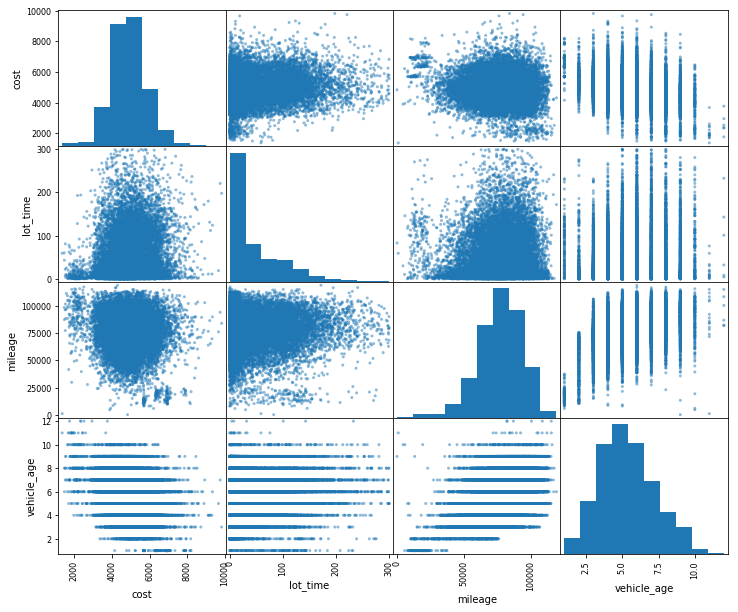

In [11]:
pd.plotting.scatter_matrix(df_data, figsize=(12,10))
plt.show()

### The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

## as vehicle age increases cost decreases, domestic vehicles with more miles as has more lot time


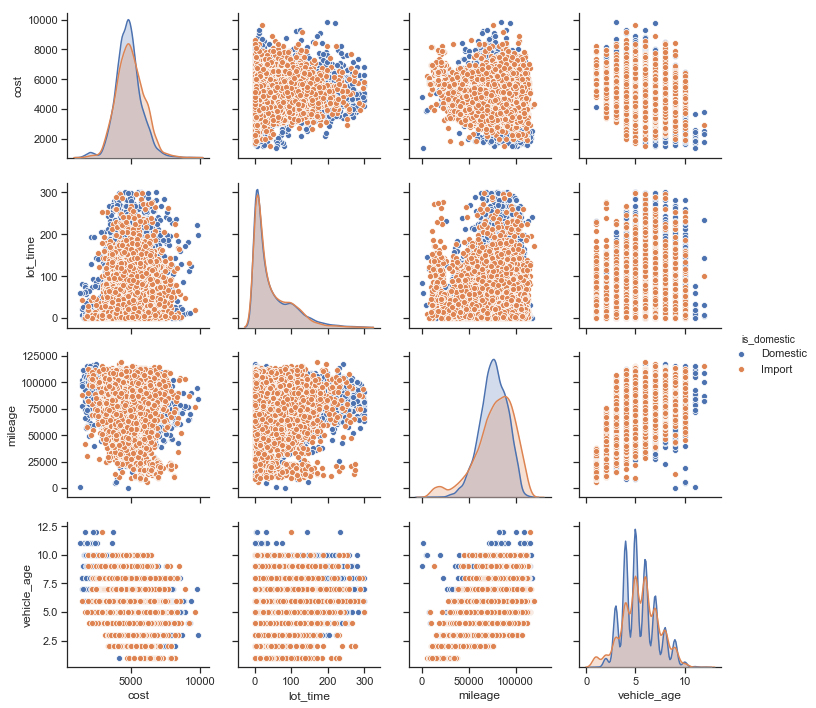

In [11]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_data,hue='is_domestic') 

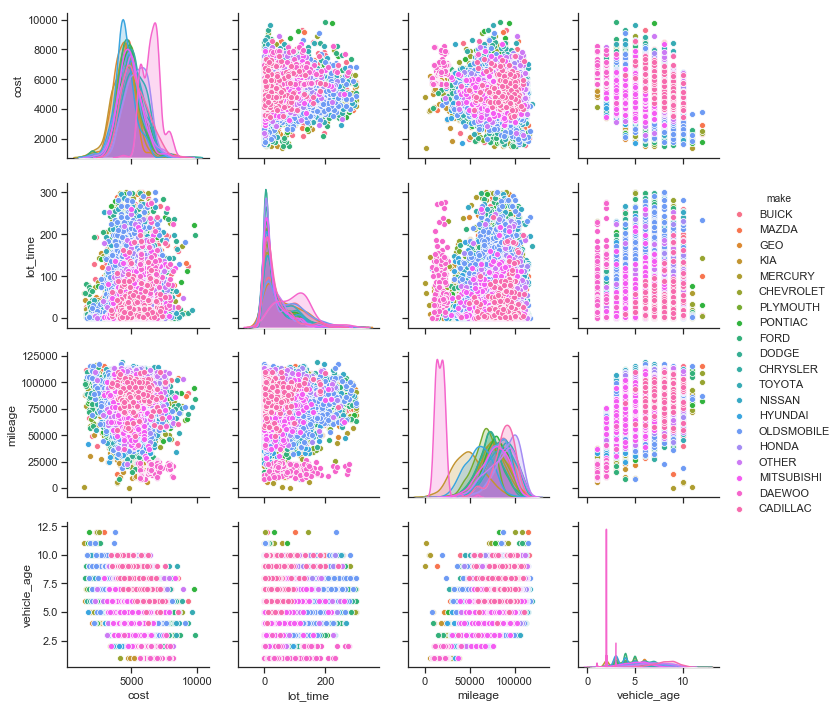

In [12]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_data,hue='make') 

### The histograms of the continuous variables show that while the tocal cost, vehicle age and mileage follow a normal distribution, lot time data is left-skewed. The majority of vehicles in the dataset have the cost of $3000–6000, with the age 3–8 years at the time of purchase, and their mileages range mainly from 60000–110000 miles. Moreover, most of the vehicles will be sold within 50 days.

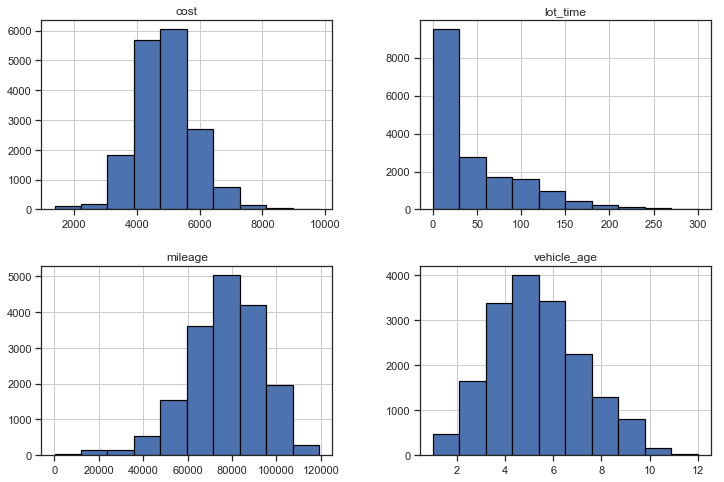

In [13]:
df_data.hist(edgecolor='black', linewidth=1.2, figsize=(12,8));
plt.show();

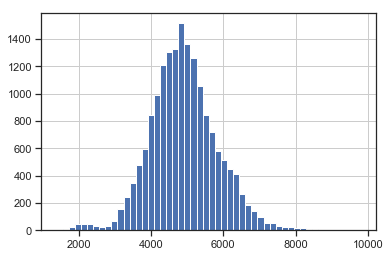

In [17]:
df_data["cost"].hist(bins = 50)

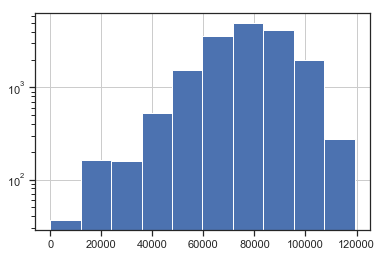

In [15]:
df_data["mileage"].hist(bins = 10, log = True)

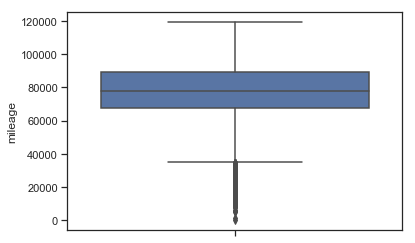

In [16]:
sns.boxplot(y=df_data['mileage'])

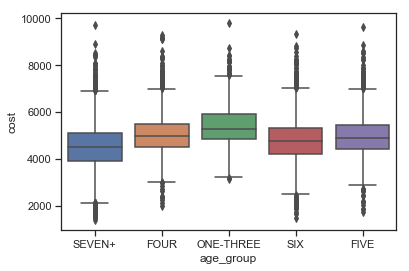

In [17]:
sns.boxplot(x=df_data['age_group'], y=df_data['cost'])


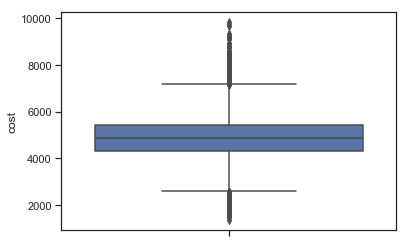

In [18]:
sns.boxplot( y=df_data['cost'])

### Most Imported cars are sold at lower mileage or too high mileage but not in middle

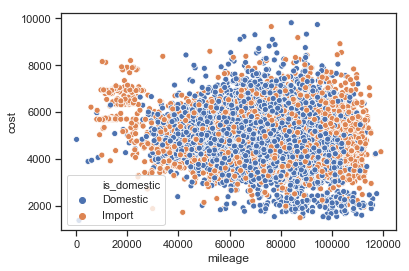

In [19]:
sns.scatterplot(x='mileage',y='cost',data=df_data,hue='is_domestic')

### There is no importance for color on cost of used car sale

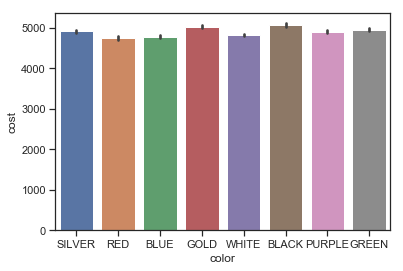

In [20]:
sns.barplot(x='color',y='cost',data=df_data)

In [37]:
df_data.head()


,cost,lot_time,is_over_age,mileage,vehicle_type,is_domestic,vehicle_age,age_group,color,make,state,make_model
0,4037,135,YES,67341,1,Domestic,8,SEVEN+,SILVER,BUICK,CA,BUICK.CENTURY
1,4662,18,NO,69384,3,Import,4,FOUR,SILVER,MAZDA,TX,MAZDA.PROTEGE
2,4459,65,NO,58239,0,Import,4,FOUR,RED,GEO,FL,GEO.METRO
3,4279,1,NO,58999,0,Import,3,ONE-THREE,RED,KIA,TX,KIA.SEPHIA
4,4472,37,NO,47234,2,Domestic,6,SIX,BLUE,MERCURY,NM,MERCURY.MYSTIQUE


In [100]:
# Split-out validation dataset
X = df_data.drop(['cost'],axis=1)  
y = df_data['cost']
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

#### https://medium.com/hugo-ferreiras-blog/dealing-with-categorical-features-in-machine-learning-1bb70f07262d

In [126]:
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
X_ohe = ohe.fit(X_train[cat_val])
X_train_ohe = X_ohe.transform(X_train[cat_val])
X_train_final = pd.concat([X_train.drop(cat_val, 1),X_train_ohe], axis=1).reindex()
X_train_final.head()

,lot_time,mileage,vehicle_age,is_over_age_NO,is_over_age_YES,vehicle_type_LUXURY,vehicle_type_FAMILY.MEDIUM,vehicle_type_FAMILY.SMALL,vehicle_type_ECONOMY,vehicle_type_FAMILY.LARGE,...,make_model_SATURN.SL-1,make_model_SATURN.S-SERIES,make_model_CADILLAC.FLEETWOOD,make_model_SATURN.SL,make_model_DAEWOO.NUBIRA SX,make_model_TOYOTA.AVALON,make_model_CHRYSLER.FWD,make_model_BUICK.LASABRE,make_model_SUBARU.IMPREZA,make_model_ACURA.VIGOR
11007,2,83779,7,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15030,109,77334,6,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7875,86,72551,5,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2529,30,89288,4,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1192,4,68701,5,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# # Encoding categorical data
# # Encoding the Independent Variable
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# labelencoder_is_over_age = LabelEncoder().fit(df_data['is_over_age'] )
# df_data['is_over_age'] = labelencoder_is_over_age.transform(df_data['is_over_age'] )
# labelencoder_vehicle_type = LabelEncoder().fit(df_data['vehicle_type'] )
# df_data['vehicle_type'] = labelencoder_vehicle_type.transform(df_data['vehicle_type'] )
# labelencoder_is_domestic = LabelEncoder().fit(df_data['is_domestic'] )
# df_data['is_domestic'] = labelencoder_is_domestic.fit_transform(df_data['is_domestic'] )
# labelencoder_age_group = LabelEncoder().fit(df_data['age_group'] )
# df_data['age_group'] = labelencoder_age_group.transform(df_data['age_group'] )
# labelencoder_color = LabelEncoder()
# df_data['color'] = labelencoder_color.fit_transform(df_data['color'] )
# labelencoder_make = LabelEncoder()
# df_data['make'] = labelencoder_make.fit_transform(df_data['make'] )
# labelencoder_state = LabelEncoder()
# df_data['state'] = labelencoder_state.fit_transform(df_data['state'] )
# labelencoder_make_model = LabelEncoder()
# df_data['make_model'] = labelencoder_make_model.fit_transform(df_data['make_model'] )


# columnsToEncode = ['is_over_age', 'vehicle_type','is_domestic','age_group','color','make','state','make_model']
# myEncoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
# myEncoder.fit(df_data[columnsToEncode])

# pd.concat([df_data.drop(columnsToEncode, 1),pd.DataFrame(myEncoder.transform(df_data[columnsToEncode]))], axis=1).reindex()

,cost,lot_time,mileage,vehicle_age,0
0,4037,135,67341,8,"(0, 1)\t1.0\n (0, 3)\t1.0\n (0, 7)\t1.0\n ..."
1,4662,18,69384,4,"(0, 0)\t1.0\n (0, 5)\t1.0\n (0, 8)\t1.0\n ..."
2,4459,65,58239,4,"(0, 0)\t1.0\n (0, 2)\t1.0\n (0, 8)\t1.0\n ..."
3,4279,1,58999,3,"(0, 0)\t1.0\n (0, 2)\t1.0\n (0, 8)\t1.0\n ..."
4,4472,37,47234,6,"(0, 0)\t1.0\n (0, 4)\t1.0\n (0, 7)\t1.0\n ..."
5,5256,12,64674,3,"(0, 0)\t1.0\n (0, 5)\t1.0\n (0, 7)\t1.0\n ..."
6,5522,7,92879,5,"(0, 0)\t1.0\n (0, 3)\t1.0\n (0, 7)\t1.0\n ..."
7,3194,16,67197,6,"(0, 0)\t1.0\n (0, 5)\t1.0\n (0, 7)\t1.0\n ..."
8,4332,7,98403,4,"(0, 0)\t1.0\n (0, 4)\t1.0\n (0, 7)\t1.0\n ..."
9,4249,42,87183,6,"(0, 0)\t1.0\n (0, 4)\t1.0\n (0, 7)\t1.0\n ..."


In [106]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [108]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [109]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train_final, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f) " % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: -400105.340565 (22618.306361) 
LASSO: -424255.433267 (22837.806503) 
EN: -695463.482484 (32403.516524) 
KNN: -1000225.053974 (33170.938981) 
CART: -868768.211016 (29940.325984) 
SVR: -872945.223312 (35072.418006) 


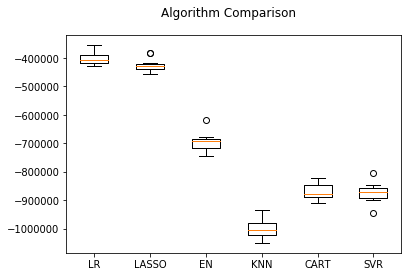

In [110]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [111]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train_final, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -669707437511624902150522404864.000000 (811188991246335235525349212160.000000)
ScaledLASSO: -399701.902768 (22881.145547)
ScaledEN: -486673.816472 (24394.509994)
ScaledKNN: -575686.087479 (21815.476041)
ScaledCART: -868478.367525 (40593.113959)
ScaledSVR: -833050.011576 (33354.477684)


### After scaled data Lasso is improved


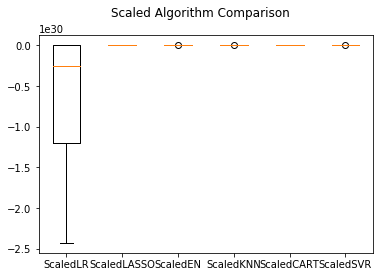

In [112]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [119]:
# Lasso Algorithm tuning
scaler = StandardScaler().fit(X_train_final)
rescaledX = scaler.transform(X_train_final)
alpha_values = np.array([0.1,0.01,0.001])
max_iter_values=np.array([1000,2000,8000])
param_grid = dict(alpha=alpha_values, max_iter = max_iter_values)
model = Lasso()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

In [120]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -399545.619456 using {'alpha': 0.01, 'max_iter': 1000}
-399680.476967 (22590.581295) with: {'alpha': 0.1, 'max_iter': 1000}
-399691.559675 (22616.334709) with: {'alpha': 0.1, 'max_iter': 2000}
-399753.541076 (22800.180246) with: {'alpha': 0.1, 'max_iter': 8000}
-399545.619456 (22460.512288) with: {'alpha': 0.01, 'max_iter': 1000}
-399573.516222 (22481.134030) with: {'alpha': 0.01, 'max_iter': 2000}
-399687.394776 (22540.682544) with: {'alpha': 0.01, 'max_iter': 8000}
-399602.453011 (22473.764763) with: {'alpha': 0.001, 'max_iter': 1000}
-399599.667788 (22476.929087) with: {'alpha': 0.001, 'max_iter': 2000}
-399564.911119 (22469.314993) with: {'alpha': 0.001, 'max_iter': 8000}


In [115]:
# # KNN Algorithm tuning   taking time 
# scaler = StandardScaler().fit(X_train_final)
# rescaledX = scaler.transform(X_train_final)
# k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
# param_grid = dict(n_neighbors=k_values)
# model = KNeighborsRegressor()
# kfold = KFold(n_splits=num_folds, random_state=seed)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
# grid_result = grid.fit(rescaledX, y_train)

KeyboardInterrupt: 

In [31]:
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: -649994.511480 using {'n_neighbors': 21}
-1079249.824177 (37551.946089) with: {'n_neighbors': 1}
-755834.458663 (32531.652748) with: {'n_neighbors': 3}
-701657.045004 (25495.851162) with: {'n_neighbors': 5}
-676230.563432 (22878.283466) with: {'n_neighbors': 7}
-665065.102532 (22493.158076) with: {'n_neighbors': 9}
-657301.801769 (23023.835374) with: {'n_neighbors': 11}
-654310.832810 (23192.297423) with: {'n_neighbors': 13}
-651215.366088 (22987.671086) with: {'n_neighbors': 15}
-650626.318947 (22514.369956) with: {'n_neighbors': 17}
-650928.342041 (23222.854432) with: {'n_neighbors': 19}
-649994.511480 (23106.669370) with: {'n_neighbors': 21}


In [117]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train_final, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -836032.177985 (40291.015263)
ScaledGBM: -519888.864918 (24673.262552)
ScaledRF: -510612.739436 (23056.533224)
ScaledET: -568460.325221 (21468.358522)


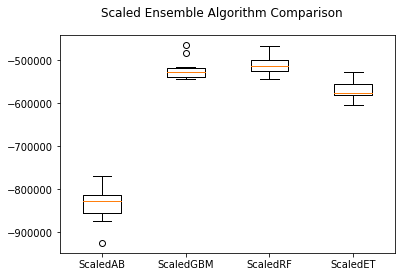

In [118]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [36]:
# Tune scaled GBM
# scaler = StandardScaler().fit(X_train)
# rescaledX = scaler.transform(X_train)
# param_grid = dict(n_estimators=[50,100,150,200,250,300,350,400])
# model = GradientBoostingRegressor(random_state=seed)
# kfold = KFold(n_splits=num_folds, random_state=seed)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
# grid_result = grid.fit(rescaledX, y_train)

In [37]:
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: -442281.949285 using {'n_estimators': 400}
-602556.010212 (28021.081188) with: {'n_estimators': 50}
-539899.820800 (24100.305815) with: {'n_estimators': 100}
-504985.312433 (22224.543812) with: {'n_estimators': 150}
-484200.770975 (20792.888456) with: {'n_estimators': 200}
-468409.812269 (21228.623299) with: {'n_estimators': 250}
-457974.795526 (20274.098632) with: {'n_estimators': 300}
-449450.780740 (19455.293420) with: {'n_estimators': 350}
-442281.949285 (19382.355297) with: {'n_estimators': 400}


In [38]:
# scaler = StandardScaler().fit(X_train)
# rescaledX = scaler.transform(X_train)
# model = GradientBoostingRegressor(random_state=seed,n_estimators=400)
# model.fit(rescaledX, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=7, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [121]:
scaler = StandardScaler().fit(X_train_final)
rescaledX = scaler.transform(X_train_final)
model = Lasso(random_state=seed,alpha=0.01,max_iter=1000)
model.fit(rescaledX, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=7,
   selection='cyclic', tol=0.0001, warm_start=False)

In [127]:
# ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
X_test_ohe = X_ohe.transform(X_test[cat_val])
X_test_final = pd.concat([X_test.drop(cat_val, 1),X_test_ohe], axis=1).reindex()
X_test_final.head()

,lot_time,mileage,vehicle_age,is_over_age_NO,is_over_age_YES,vehicle_type_LUXURY,vehicle_type_FAMILY.MEDIUM,vehicle_type_FAMILY.SMALL,vehicle_type_ECONOMY,vehicle_type_FAMILY.LARGE,...,make_model_SATURN.SL-1,make_model_SATURN.S-SERIES,make_model_CADILLAC.FLEETWOOD,make_model_SATURN.SL,make_model_DAEWOO.NUBIRA SX,make_model_TOYOTA.AVALON,make_model_CHRYSLER.FWD,make_model_BUICK.LASABRE,make_model_SUBARU.IMPREZA,make_model_ACURA.VIGOR
13716,3,94866,7,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7036,18,91261,8,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15432,94,60468,8,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13701,100,65392,3,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3705,15,70580,6,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [128]:
# transform the test dataset
rescaledTestX = scaler.transform(X_test_final)
predictions = model.predict(rescaledTestX)
print(mean_squared_error(y_test, predictions))
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(rescaledTestX, y_test)

print(f"MSE: {MSE}, R2: {r2}")

414978.48585987225
MSE: 414978.48585987225, R2: 0.5297240757299926


In [129]:
pd.DataFrame(zip(rescaledTestX, y_test,predictions)).head(200)

,0,1,2
0,"[-0.8283585943303869, 1.0565117743343282, 0.88...",4377,5746.585505
1,"[-0.5463327028158647, 0.8438293016886138, 1.45...",4877,5111.488194
2,"[0.8825984808577151, -0.9728506928133223, 1.45...",4364,4708.712980
3,"[0.9954088374635239, -0.682351803685029, -1.39...",4538,4654.422497
4,"[-0.6027378811187691, -0.37627783195521886, 0....",4847,5109.950149
5,"[-0.7155482377245781, -1.2693672274922017, -1....",5068,5293.937741
6,"[-0.3207119896042468, 1.0864230125122414, 0.31...",4737,5158.724463
7,"[1.8978916903099954, 0.1753986733735118, 0.316...",4104,4187.564527
8,"[1.1458226462712693, 0.6040674240652621, -0.25...",4150,4425.168287
9,"[-0.5651344289168329, -1.7015167731592908, -0....",5748,4908.066438


In [130]:
pickling_on = open("used_car_sale_price_train_test.pickle","wb")
pickle.dump(scaler, pickling_on)
pickle.dump(model, pickling_on)
pickle.dump(X_ohe, pickling_on)
pickle.dump(cat_val, pickling_on)
pickling_on.close()

In [141]:

val_data_row = [{'cost': 4751, 'lot_time':126 , 'is_over_age': 'YES', 'mileage':77606, 'vehicle_type': 'ECONOMY',\
       'is_domestic': 'Domestic', 'vehicle_age':5 , 'age_group': 'FIVE', 'color': 'BLUE', 'make': 'CHEVROLET', 'state': 'FL',\
       'make_model': 'CHEVROLET.CAVALIER'}]
                
df_val_data_row =pd.DataFrame(val_data_row)
df_val_data_row.head()

X_val = df_val_data_row.drop(['cost'],axis=1)  
y_val = df_val_data_row['cost']

X_val_ohe = X_ohe.transform(X_val[cat_val])
X_val_final = pd.concat([X_val.drop(cat_val, 1),X_val_ohe], axis=1).reindex()
X_val_final.head()

# transform the val dataset
rescaledValX = scaler.transform(X_val_final)
val_pred = model.predict(rescaledValX)
print(mean_squared_error(y_val, val_pred))
MSE = mean_squared_error(y_val, val_pred)
r2 = model.score(rescaledValX, y_val)

print(f"MSE: {MSE}, R2: {r2}")

perc_accu=(1-((val_pred-y_val)/val_pred))*100
print(f'Percentage Accuracy: {perc_accu}')
pd.DataFrame(zip(rescaledValX, y_val,val_pred)).head(200)


3939.5990335337524
MSE: 3939.5990335337524, R2: 0.0
Percentage Accuracy: 0    98.69611
Name: cost, dtype: float64


,0,1,2
0,"[1.484253716088696, 0.038231752735152405, -0.2...",4751,4813.766225
